In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
logistic = pd.read_csv("/Users/admin/Documents/UNAD/2do Semestre/ANÁLISIS DE DATOS - (202016908A_1394)/Unidad 1/Etapa 2/DataSet/framingham.csv")

In [3]:
logistic.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(logistic.BMI, logistic.TenYearCHD, test_size=0.2, random_state=0)

In [7]:
y_train.shape

(3390,)

In [8]:
logi_regre = LogisticRegression()

In [10]:
logistic.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [11]:
logistic.dropna(inplace=True)

In [12]:
logistic.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

<Axes: >

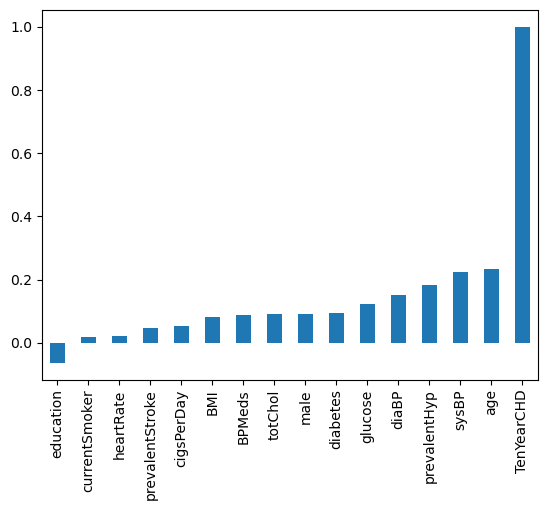

In [15]:
logistic.corr()['TenYearCHD'].sort_values(ascending=True).plot(kind='bar')

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler=MinMaxScaler()
logistic_scaled = scaler.fit_transform(logistic)

In [19]:
logistic_scaled = pd.DataFrame(logistic_scaled)

In [21]:
logistic_scaled.columns = logistic.columns

In [22]:
logistic_scaled.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,0.184211,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.168378,0.106383,0.232804,0.277024,0.363636,0.104520,0.0
1,0.0,0.368421,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.281314,0.177305,0.349206,0.319680,0.515152,0.101695,0.0
2,1.0,0.421053,0.000000,1.0,0.285714,0.0,0.0,0.0,0.0,0.271047,0.208038,0.338624,0.237518,0.313131,0.084746,0.0
3,0.0,0.763158,0.666667,1.0,0.428571,0.0,0.0,1.0,0.0,0.229979,0.314421,0.497354,0.316045,0.212121,0.177966,1.0
4,0.0,0.368421,0.666667,1.0,0.328571,0.0,0.0,0.0,0.0,0.353183,0.219858,0.380952,0.183228,0.414141,0.127119,0.0


<function matplotlib.pyplot.show(close=None, block=None)>

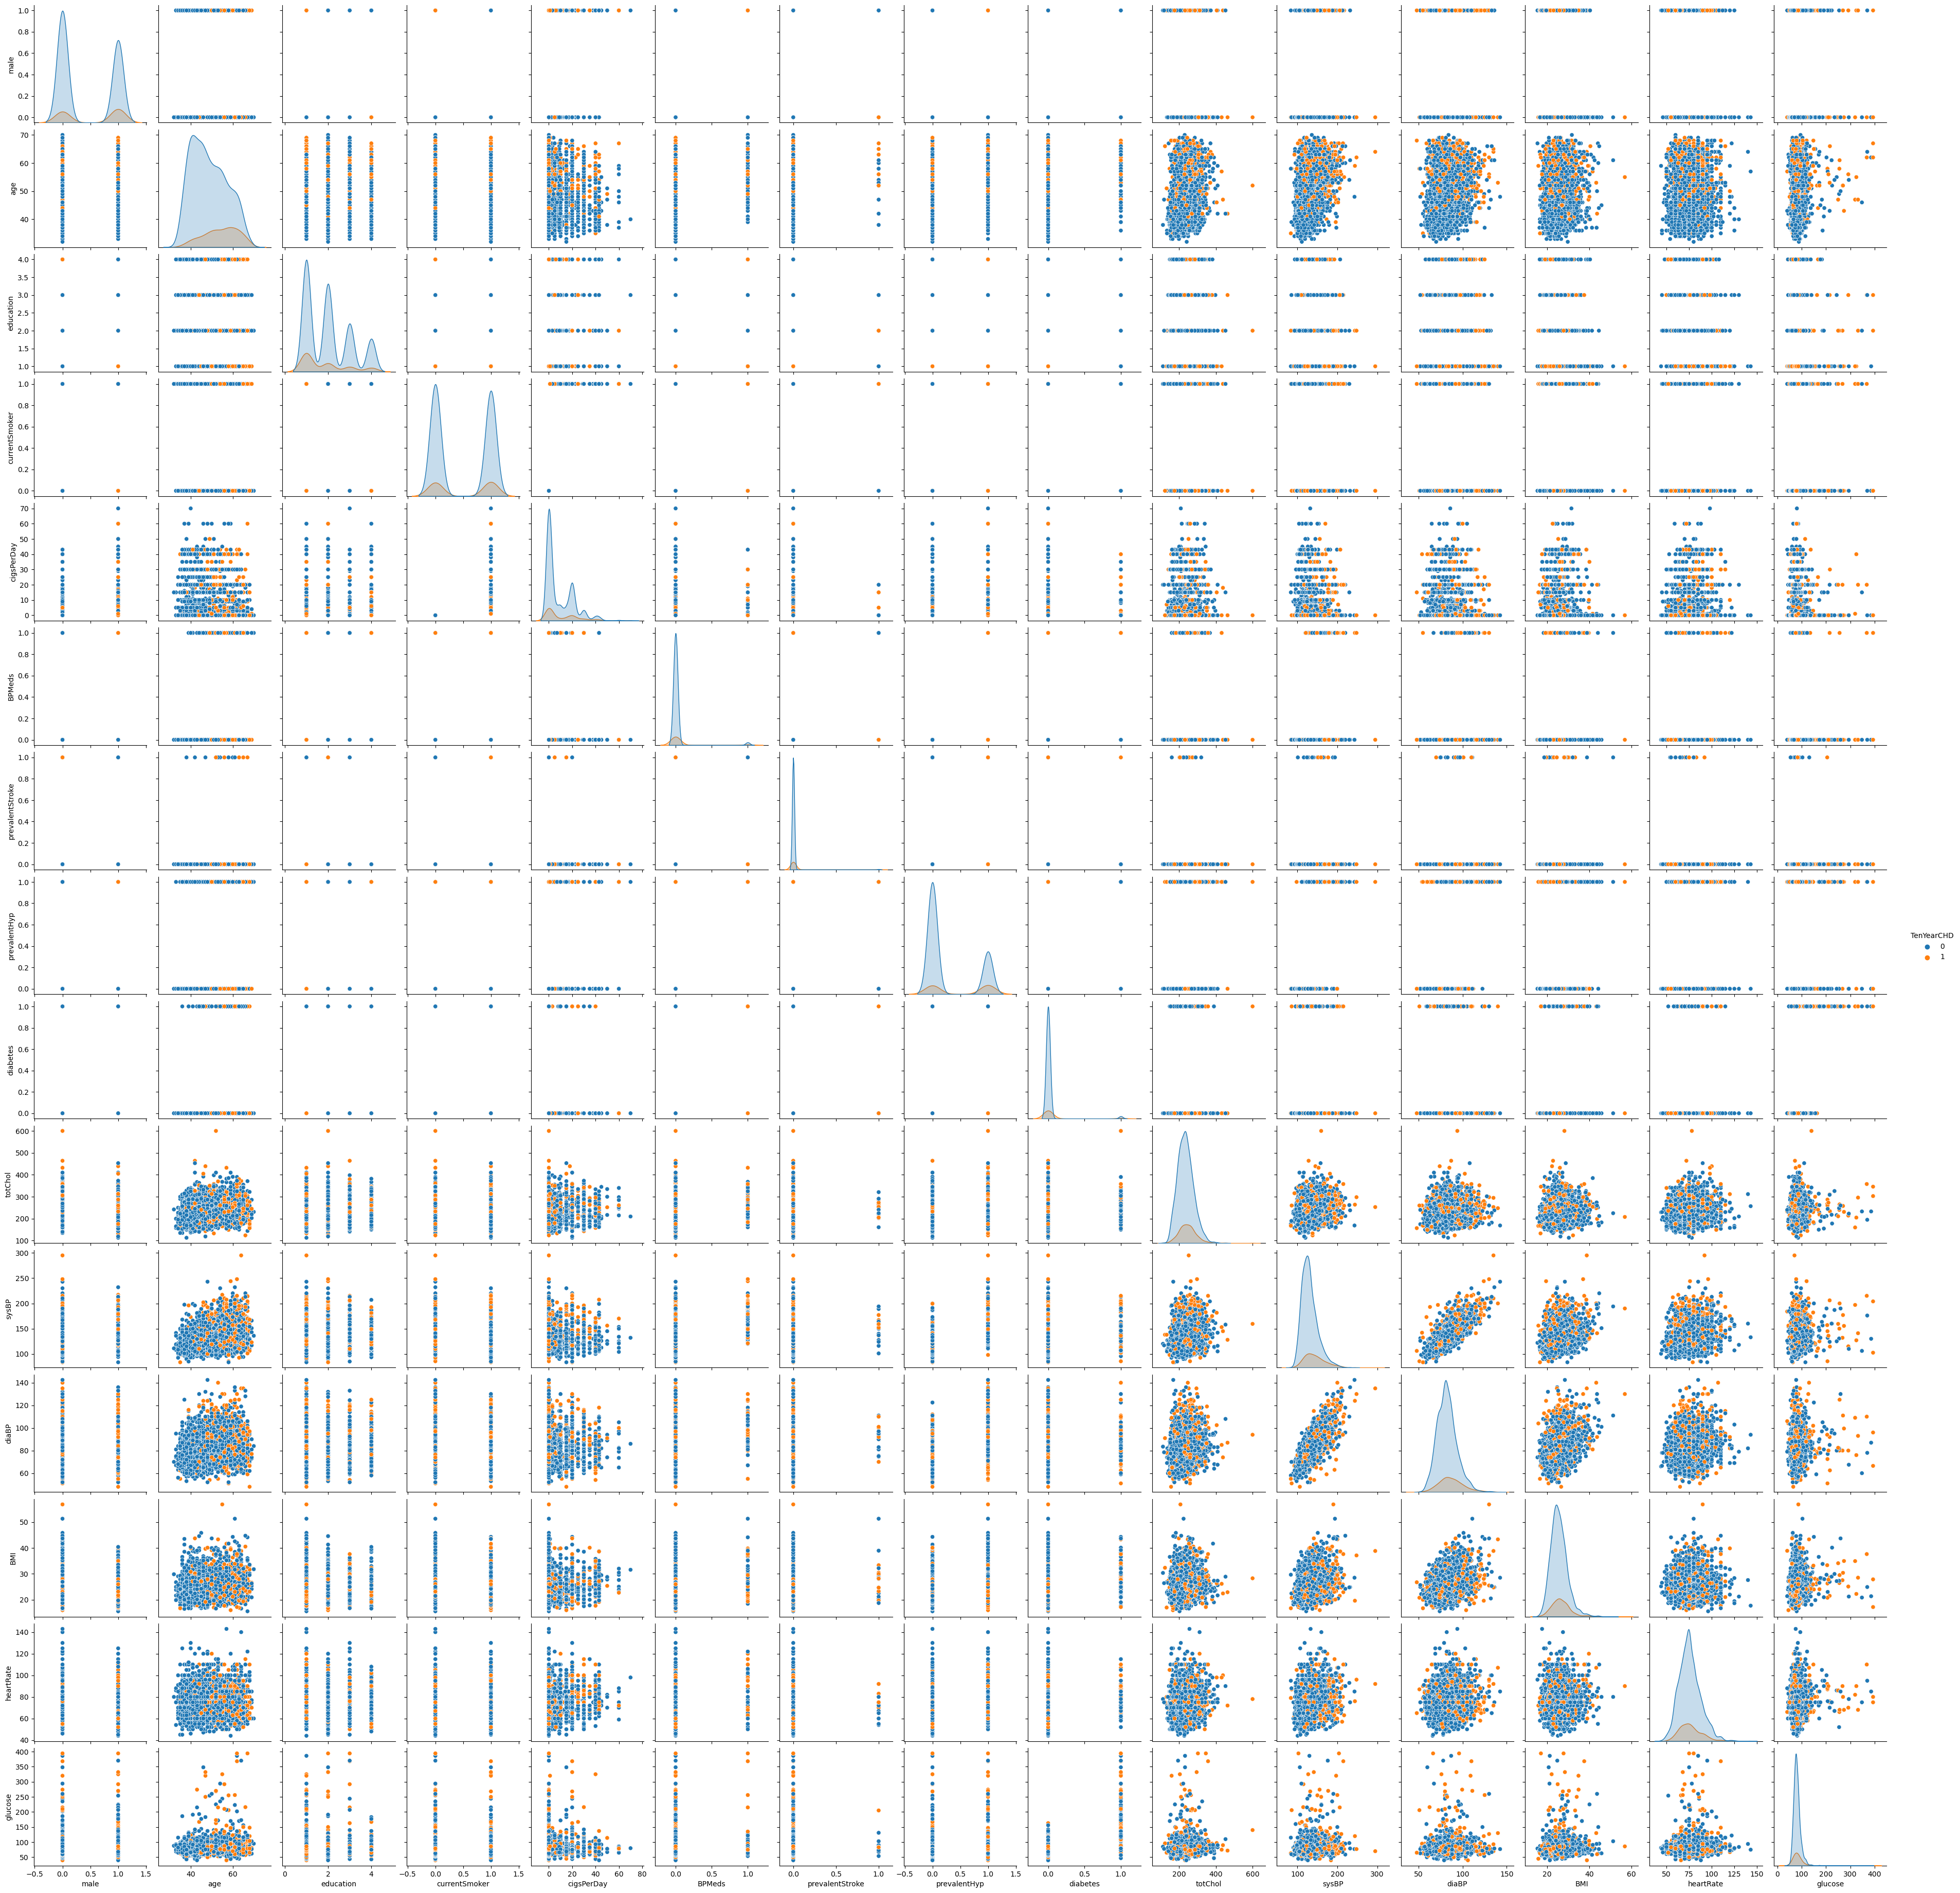

In [26]:
sns.pairplot(data=logistic, hue='TenYearCHD')
plt.show

In [27]:
x=logistic_scaled.drop('TenYearCHD', axis=1)
y=logistic_scaled['TenYearCHD'].values

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(logistic.BMI, logistic.TenYearCHD, test_size=0.3, random_state=42)

In [29]:
y_train.shape

(2559,)

In [33]:
logi_regre = LogisticRegression()
result = logi_regre.fit(x_train.values.reshape(-1, 1), y_train)

In [49]:
from sklearn import metrics
predic_test = logi_regre.predict(x_test.values.reshape(-1, 1))
print(metrics.accuracy_score(y_test, predic_test))

0.8413855970829535


In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<function matplotlib.pyplot.show(close=None, block=None)>

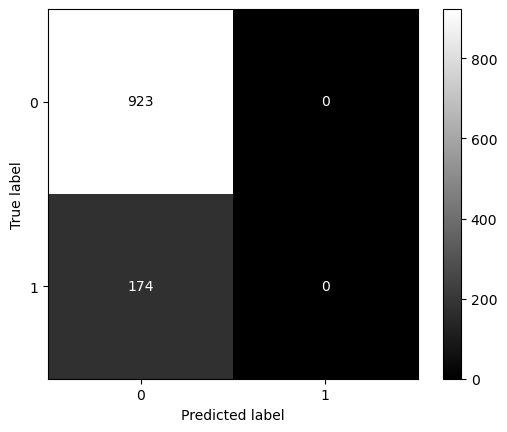

In [51]:
cm=confusion_matrix(y_test, predic_test, labels=logi_regre.classes_)
dis=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logi_regre.classes_)
dis.plot(cmap='gray')
plt.show